In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
data=pd.read_csv('covid19india.csv')
data

,Num Cases,Date Announced,Age Bracket,Gender,Detected City,Detected District,Detected State,Current Status,Day,Month,Year
0,1,30/01/2020,20,F,Thrissur,Thrissur,Kerala,Recovered,30.0,1.0,2020.0
1,1,02/02/2020,NaN,NaN,Alappuzha,Alappuzha,Kerala,Recovered,2.0,2.0,2020.0
2,1,03/02/2020,NaN,NaN,Kasaragod,Kasaragod,Kerala,Recovered,3.0,2.0,2020.0
3,1,02/03/2020,45,M,East Delhi (Mayur Vihar),East Delhi,Delhi,Recovered,2.0,3.0,2020.0
4,1,02/03/2020,24,M,Hyderabad,Hyderabad,Telangana,Recovered,2.0,3.0,2020.0
...,...,...,...,...,...,...,...,...,...,...,...
17670,1,20/04/2020,NaN,NaN,NaN,Mumbai,Maharashtra,Hospitalized,20.0,4.0,2020.0
17671,1,20/04/2020,NaN,NaN,NaN,Mumbai,Maharashtra,Hospitalized,20.0,4.0,2020.0
17672,1,20/04/2020,NaN,NaN,NaN,Mumbai,Maharashtra,Hospitalized,20.0,4.0,2020.0
17673,1,20/04/2020,NaN,NaN,NaN,Mumbai,Maharashtra,Hospitalized,20.0,4.0,2020.0


In [7]:
day=data[data['Current Status']=='Hospitalized'].groupby(['Month','Day'])['Num Cases'].sum()
day

Month  Day 
3.0    4.0        5
       5.0        1
       7.0        2
       9.0        4
       10.0       4
       11.0       8
       12.0       4
       13.0       6
       14.0      11
       15.0       8
       16.0      12
       17.0      14
       18.0      22
       19.0      21
       20.0      52
       21.0      67
       22.0      59
       23.0      82
       24.0      63
       25.0      75
       26.0      58
       27.0     140
       28.0     123
       29.0     106
       30.0     178
       31.0     306
4.0    1.0      423
       2.0      485
       3.0      556
       4.0      576
       5.0      606
       6.0      485
       7.0      570
       8.0      563
       9.0      812
       10.0     870
       11.0     853
       12.0     758
       13.0    1243
       14.0    1031
       15.0     884
       16.0    1061
       17.0     922
       18.0    1370
       19.0    1579
       20.0     310
Name: Num Cases, dtype: int64

In [8]:
x=np.arange(len(day))
x=x.reshape(-1,1)
y=day.values

In [9]:
from sklearn.tree import DecisionTreeRegressor
reg=DecisionTreeRegressor()
reg.fit(x,y)

DecisionTreeRegressor()

In [10]:
Yp=reg.predict(x)
Yp

array([5.000e+00, 1.000e+00, 2.000e+00, 4.000e+00, 4.000e+00, 8.000e+00,
       4.000e+00, 6.000e+00, 1.100e+01, 8.000e+00, 1.200e+01, 1.400e+01,
       2.200e+01, 2.100e+01, 5.200e+01, 6.700e+01, 5.900e+01, 8.200e+01,
       6.300e+01, 7.500e+01, 5.800e+01, 1.400e+02, 1.230e+02, 1.060e+02,
       1.780e+02, 3.060e+02, 4.230e+02, 4.850e+02, 5.560e+02, 5.760e+02,
       6.060e+02, 4.850e+02, 5.700e+02, 5.630e+02, 8.120e+02, 8.700e+02,
       8.530e+02, 7.580e+02, 1.243e+03, 1.031e+03, 8.840e+02, 1.061e+03,
       9.220e+02, 1.370e+03, 1.579e+03, 3.100e+02])

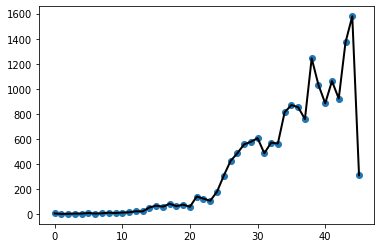

In [11]:
plt.scatter(x,y)
plt.plot(x,Yp,color='k',linewidth=2)
plt.show()

In [12]:
accuracy=reg.score(x,y)*100
accuracy

100.0

In [16]:
reg.predict([[366]])

array([310.])